### Step 1: Import Necessary Libraries
Import:
- `pandas` is for loading and working with tabular data (like our CSV).
- `numpy` is for efficient numerical operations.
- `matplotlib.pyplot` is for creating plots and visualizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Load the Data

[Download](https://gist.github.com/netj/8836201) the CSV file, and manually import it (Recommneded for practice purpose)

We need to get our data from the `iris.csv` file into a structure that we can work with in Python. The Pandas `DataFrame` is the standard for this. We use `pd.read_csv()` to do this.

In [2]:
# Load the dataset from the CSV file
file_path = 'iris.csv'
iris_df = pd.read_csv(file_path)

### Step 3: Initial Data Exploration

Before diving into analysis, it's important to get a feel for your data. What do the columns look like? Are there any missing values? What are the data types? Pandas provides simple functions for this initial inspection.

Use the following functions to display basic features of the Iris dataset
- `.head()` shows us the first few rows of the data.
- `.info()` gives a concise summary of the DataFrame, including data types and non-null values.
- `.describe()` provides descriptive statistics for the numerical columns (like mean, std, min, max).

In [3]:
# Display the first 5 rows of the dataframe
print("--- First 5 Rows ---")
display(iris_df.head())

# Get a summary of the dataframe
print("\n--- DataFrame Info ---")
iris_df.info()

--- First 5 Rows ---


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa



--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Step 4: Process Data with NumPy and Pandas

This is where we see how Pandas and NumPy work together. Let's create a new feature to see if the ratio of petal length to width is a distinguishing characteristic. 

Pandas `DataFrame` columns can be treated like NumPy arrays, allowing us to perform fast, vectorized operations on them. We will calculate `petal.length / petal.width` and store it in a new column called `petal_ratio`.

**HINT:** You will need to select the columns with Pandas, then use `.to_numpy()` and divide the columns in the new column `petal_ratio`

Once you are done, display the first 5 rows

In [5]:
# Use NumPy's vectorized operations on Pandas columns
# We access the columns and divide them. The result is a new Pandas Series.
petal_length = iris_df['petal.length'].to_numpy()
petal_width = iris_df['petal.width'].to_numpy()

# Add the new calculated ratio as a new column in our DataFrame
iris_df['petal_ratio'] = petal_length / petal_width

print("--- DataFrame with New 'petal_ratio' Column ---")
display(iris_df.head())

--- DataFrame with New 'petal_ratio' Column ---


,sepal.length,sepal.width,petal.length,petal.width,variety,petal_ratio
0,5.1,3.5,1.4,0.2,Setosa,7.0
1,4.9,3.0,1.4,0.2,Setosa,7.0
2,4.7,3.2,1.3,0.2,Setosa,6.5
3,4.6,3.1,1.5,0.2,Setosa,7.5
4,5.0,3.6,1.4,0.2,Setosa,7.0


### Step 5: Visualisation


#### 5.1 Histogram
Let's start with a histogram. It reveals the distribution of a single variable. It groups numbers into ranges (bins) and the height of the bar shows how many data points fall into that range.

* By overlaying the histograms for petal.length for all three species, we can answer questions like:
* Does this feature follow a normal (bell-curve) distribution?
* How much do the petal lengths overlap between species?
* Are there clear cut-off points in petal length that could help us classify the flowers?

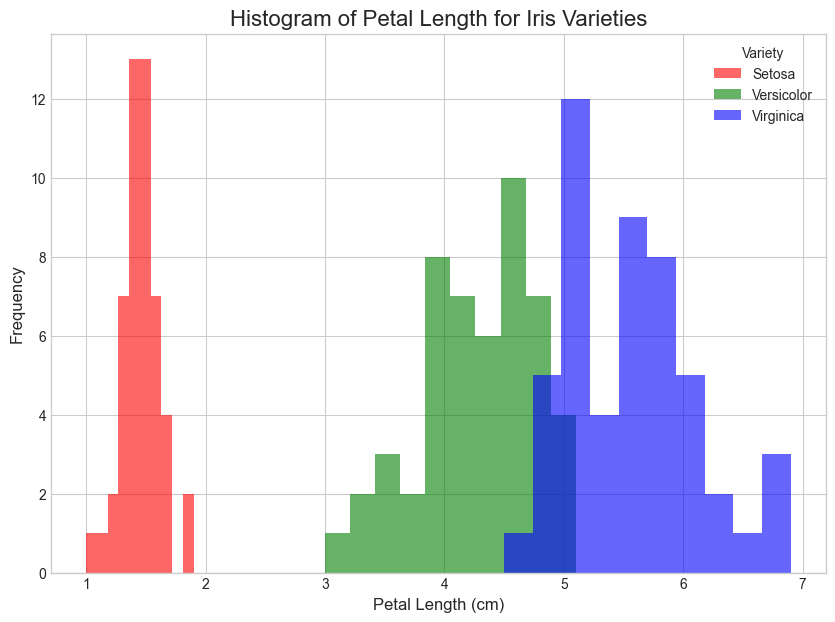

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

colors = {'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'}
feature = 'petal.length'

# We can plot a histogram for each species on the same axes to compare them.
# The 'alpha' parameter makes the bars semi-transparent so we can see overlaps.
for variety in iris_df['variety'].unique():
    # Filter the DataFrame for the current variety
    subset = iris_df[iris_df['variety'] == variety]
    
    # Plot the histogram for the chosen feature
    ax.hist(subset[feature], bins=10, alpha=0.6, label=variety, color=colors[variety])

ax.set_title(f'Histogram of {feature.replace(".", " ").title()} for Iris Varieties', fontsize=16)
ax.set_xlabel(f'{feature.replace(".", " ").title()} (cm)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Add a legend
ax.legend(title='Variety', fontsize=10)

plt.show()


#### 5.2 Scatter Plot
A scatter plot is an excellent way to see the relationship between two numerical variables. We will plot `sepal.length` vs. `sepal.width`.

To make the plot even more insightful, we will color-code each point based on its `variety`. This will help us see if the different species of Iris have distinct sepal characteristics and if they form visible clusters.

In [1]:
# Set up the plot
plt.style.use('seaborn-v0_8-whitegrid') 
fig, ax = plt.subplots(figsize=(10, 7))

# Define colors for each variety for a clear visual distinction
colors = {'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'}

# We group the dataframe by 'variety' and plot each group with its specific color
for variety, group in iris_df.groupby('variety'):
    ax.scatter(group['sepal.length'], group['sepal.width'], 
               c=colors[variety], label=variety, 
               alpha=0.8, edgecolors='k', s=80)

ax.set_title('Sepal Length vs. Sepal Width for Iris Varieties', fontsize=16)
ax.set_xlabel('Sepal Length (cm)', fontsize=12)
ax.set_ylabel('Sepal Width (cm)', fontsize=12)

ax.legend(title='Variety', fontsize=10)

plt.show()

NameError: name 'plt' is not defined

### Analysis of the Visualization

From the scatter plot, we can immediately draw some conclusions:

1.  **Setosa (Red):** This species forms a very distinct cluster. It generally has a smaller sepal length but a larger sepal width compared to the other two.
2.  **Versicolor (Green) and Virginica (Blue):** These two species are more similar to each other than to Setosa. However, we can still see a pattern: Virginica generally has a larger sepal length than Versicolor.

This simple visualization clearly shows that sepal dimensions are a useful feature for distinguishing between the different Iris varieties, especially for identifying Setosa.